In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [3]:
from google.colab import files
files.upload()  # Upload the kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download snap/amazon-fine-food-reviews

Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
100% 242M/242M [00:12<00:00, 21.2MB/s]
100% 242M/242M [00:12<00:00, 21.1MB/s]


In [5]:
!unzip amazon-fine-food-reviews.zip -d amazon-fine-food-reviews

Archive:  amazon-fine-food-reviews.zip
  inflating: amazon-fine-food-reviews/Reviews.csv  
  inflating: amazon-fine-food-reviews/database.sqlite  
  inflating: amazon-fine-food-reviews/hashes.txt  


In [6]:
df = pd.read_csv('/content/amazon-fine-food-reviews/Reviews.csv')
print(df.shape)

(568454, 10)


In [38]:
df = df.head(1000)
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos,roberta_neg,roberta_neu,roberta_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.000,0.695,0.305,0.009624,0.049980,0.940395
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0.138,0.862,0.000,0.508986,0.452413,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.091,0.754,0.155,0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,0.000,1.000,0.000,0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.000,0.552,0.448,0.001635,0.010302,0.988063


Text(0.5, 0, 'Star Rating')

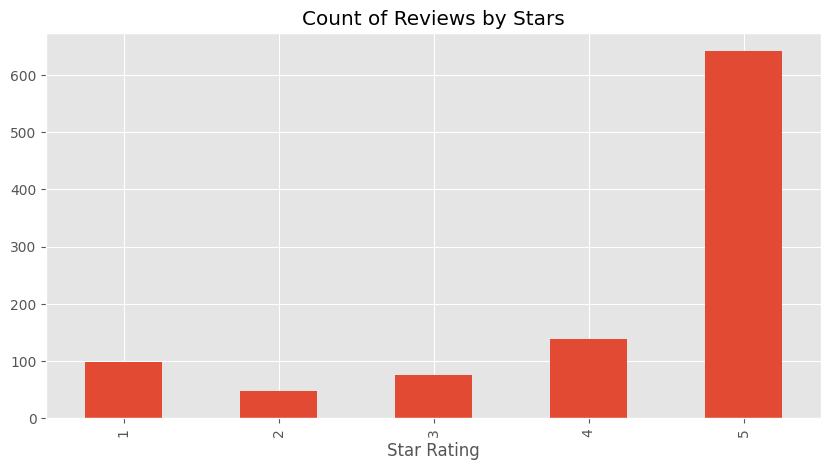

In [39]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Star Rating')


In [40]:
# Using VADER

import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [42]:
sid.polarity_scores(df.loc[0, 'Text'])

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [19]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [43]:
df['res'] = df['Text'].apply(lambda x: sid.polarity_scores(x))

<ipython-input-43-ae5920f453e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res'] = df['Text'].apply(lambda x: sid.polarity_scores(x))


In [21]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,res
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp..."


In [44]:
df['compound'] = df['res'].apply(lambda x: x['compound'])

<ipython-input-44-1543286a7813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'] = df['res'].apply(lambda x: x['compound'])


In [45]:
df['neg'] = df['res'].apply(lambda x: x['neg'])

<ipython-input-45-14aee22537fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neg'] = df['res'].apply(lambda x: x['neg'])


In [46]:
df['neu'] = df['res'].apply(lambda x: x['neu'])

<ipython-input-46-2bb29ed17129>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neu'] = df['res'].apply(lambda x: x['neu'])


In [47]:
df['pos'] = df['res'].apply(lambda x: x['pos'])

<ipython-input-47-808cdd3b13f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pos'] = df['res'].apply(lambda x: x['pos'])


In [48]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos,roberta_neg,roberta_neu,roberta_pos,res
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.000,0.695,0.305,0.009624,0.049980,0.940395,"{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'comp..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0.138,0.862,0.000,0.508986,0.452413,0.038600,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.091,0.754,0.155,0.003229,0.098067,0.898704,"{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'co..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,0.000,1.000,0.000,0.002295,0.090219,0.907486,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.000,0.552,0.448,0.001635,0.010302,0.988063,"{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp..."


In [49]:
df.drop('res',axis =1 , inplace = True)

<ipython-input-49-85331f6e4fb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('res',axis =1 , inplace = True)


In [50]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos,roberta_neg,roberta_neu,roberta_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.000,0.695,0.305,0.009624,0.049980,0.940395
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0.138,0.862,0.000,0.508986,0.452413,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.091,0.754,0.155,0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,0.000,1.000,0.000,0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.000,0.552,0.448,0.001635,0.010302,0.988063


In [51]:
Vaders = df

In [52]:
Vaders

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos,roberta_neg,roberta_neu,roberta_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.000,0.695,0.305,0.009624,0.049980,0.940395
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0.138,0.862,0.000,0.508986,0.452413,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.091,0.754,0.155,0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,0.000,1.000,0.000,0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.000,0.552,0.448,0.001635,0.010302,0.988063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...,0.9788,0.026,0.721,0.253,0.001335,0.006112,0.992553
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i...",0.9309,0.000,0.786,0.214,0.002649,0.016077,0.981274
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...,0.9634,0.000,0.673,0.327,0.001362,0.011372,0.987266
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...,-0.0129,0.063,0.874,0.062,0.661606,0.293687,0.044707


<Axes: xlabel='Score', ylabel='compound'>

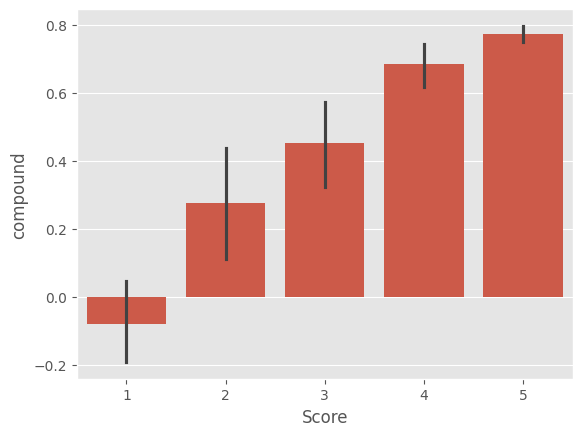

In [53]:
sns.barplot(x = 'Score', y = 'compound', data = Vaders, estimator = np.mean)

Text(0.5, 1.0, 'Neutral Score')

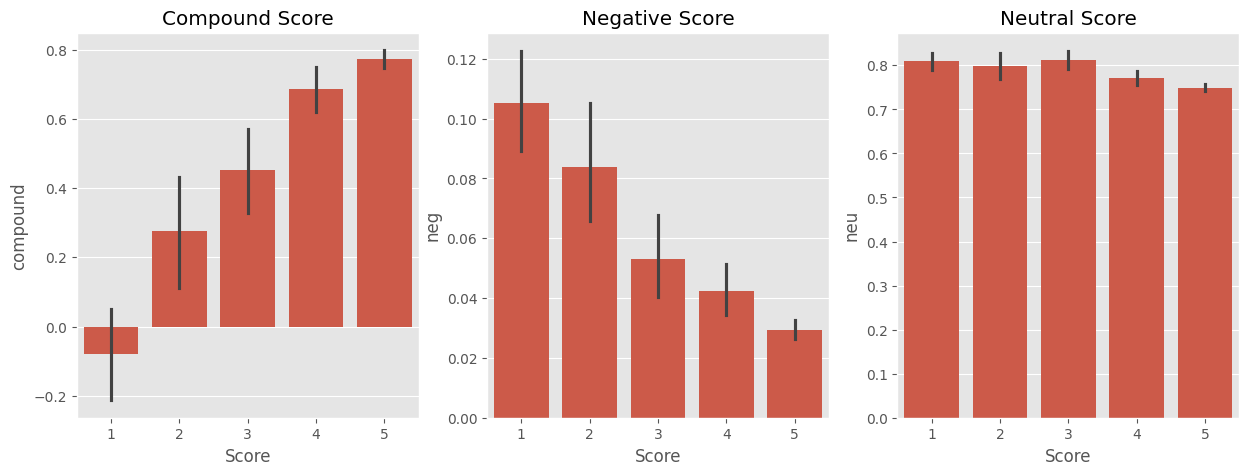

In [54]:
fig,axs = plt.pyplot.subplots(1,3, figsize = (15,5))
sns.barplot(x = 'Score', y = 'compound', data = Vaders, estimator = np.mean, ax = axs[0])
sns.barplot(x = 'Score', y = 'neg', data = Vaders, estimator = np.mean, ax = axs[1])
sns.barplot(x = 'Score', y = 'neu', data = Vaders, estimator = np.mean, ax = axs[2])
axs[0].set_title('Compound Score')
axs[1].set_title('Negative Score')
axs[2].set_title('Neutral Score')


In [33]:
!pip install transformers

In [34]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
from scipy.special import softmax

In [35]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [63]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [64]:
from tqdm import tqdm
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sid.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  8%|▊         | 82/1000 [00:20<02:55,  5.22it/s]

Broke for id 83


 19%|█▉        | 188/1000 [00:43<01:47,  7.59it/s]

Broke for id 187


 53%|█████▎    | 528/1000 [02:07<02:23,  3.30it/s]

Broke for id 529


 54%|█████▍    | 541/1000 [02:10<01:04,  7.12it/s]

Broke for id 540


 74%|███████▍  | 745/1000 [03:01<01:20,  3.15it/s]

Broke for id 746


 86%|████████▋ | 864/1000 [03:29<00:21,  6.25it/s]

Broke for id 863


100%|██████████| 1000/1000 [04:07<00:00,  4.04it/s]


In [65]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [66]:
results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'compound', 'neg', 'neu', 'pos'],
      dtype='object')

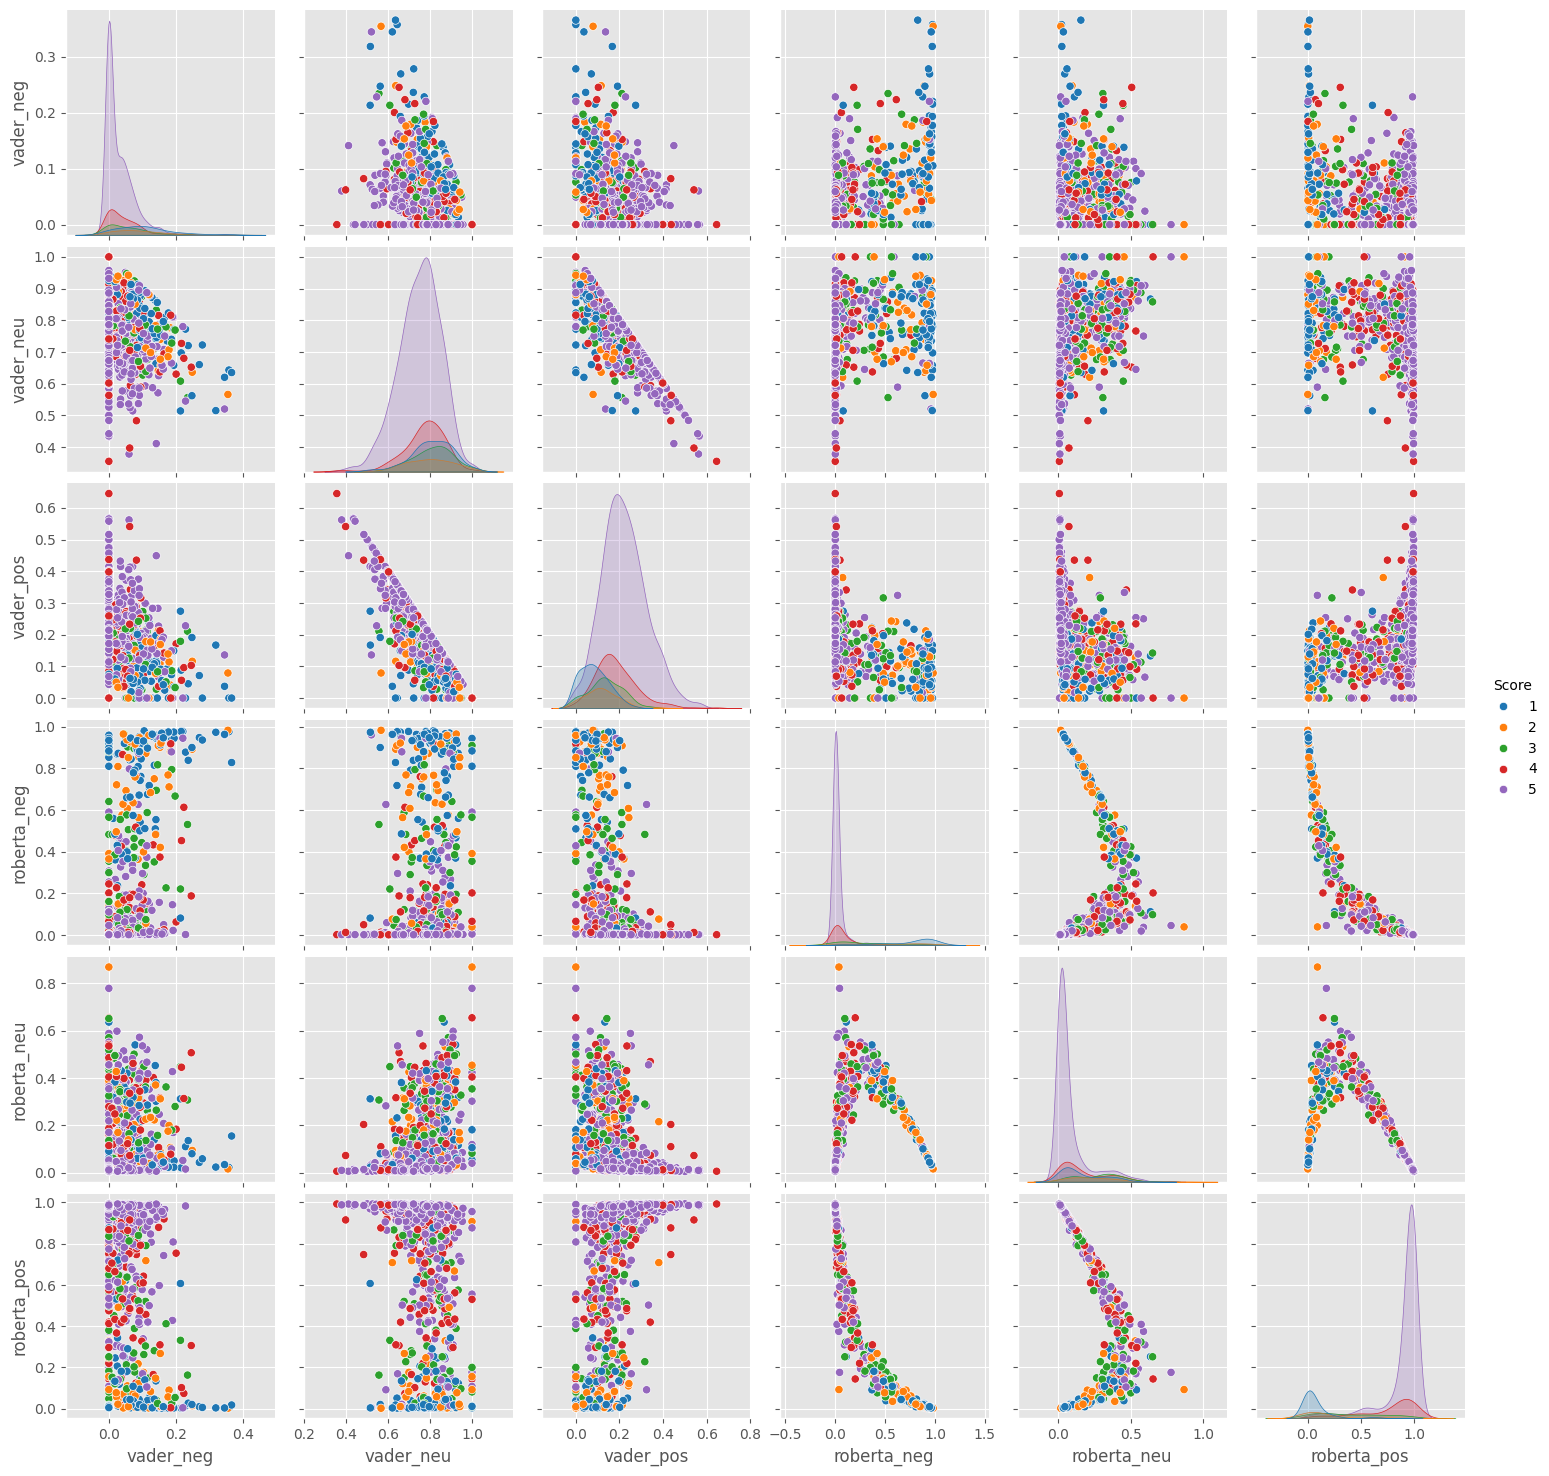

In [67]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                   'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')


In [68]:
# Text that is positive by the roberta model with low score
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [69]:
# Text that is positive by the vader model with low score
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [71]:
# Text that is negative by the model with High score
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [72]:
# Text that is negative by the model with High score
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'